In [44]:
import pandas as pd       
import numpy as np        
import matplotlib.pyplot as plt   
import seaborn as sns            
import plotly.express as px      
import datetime as dt
import openpyxl
import streamlit as st

In [45]:
df= pd.read_csv("sales_data_sample.csv", encoding="latin1")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [46]:
df.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


In [47]:
df.isnull().sum()

ORDERNUMBER            0
QUANTITYORDERED        0
PRICEEACH              0
ORDERLINENUMBER        0
SALES                  0
ORDERDATE              0
STATUS                 0
QTR_ID                 0
MONTH_ID               0
YEAR_ID                0
PRODUCTLINE            0
MSRP                   0
PRODUCTCODE            0
CUSTOMERNAME           0
PHONE                  0
ADDRESSLINE1           0
ADDRESSLINE2        2521
CITY                   0
STATE               1486
POSTALCODE            76
COUNTRY                0
TERRITORY           1074
CONTACTLASTNAME        0
CONTACTFIRSTNAME       0
DEALSIZE               0
dtype: int64

In [48]:

df['ADDRESSLINE2']=df['ADDRESSLINE2'].fillna('Unknown')
df['STATE']=df['STATE'].fillna('Unknown')
df['POSTALCODE']=df['POSTALCODE'].fillna('0')
df['TERRITORY']=df['TERRITORY'].fillna('Unknown')
df['order_date'] = pd.to_datetime(
    dict(year=df['YEAR_ID'], month=df['MONTH_ID'], day=1), errors='coerce'
)

df.to_csv("output/sales_data_cleaned.csv", index=False)


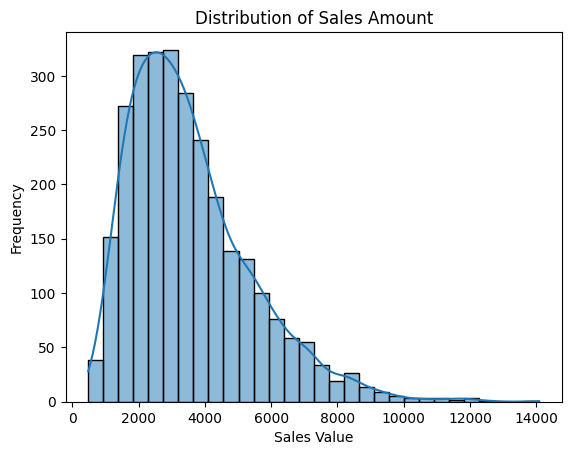

In [49]:
sns.histplot(df['SALES'], bins=30, kde=True)
plt.title("Distribution of Sales Amount")
plt.xlabel("Sales Value")
plt.ylabel("Frequency")
plt.show()

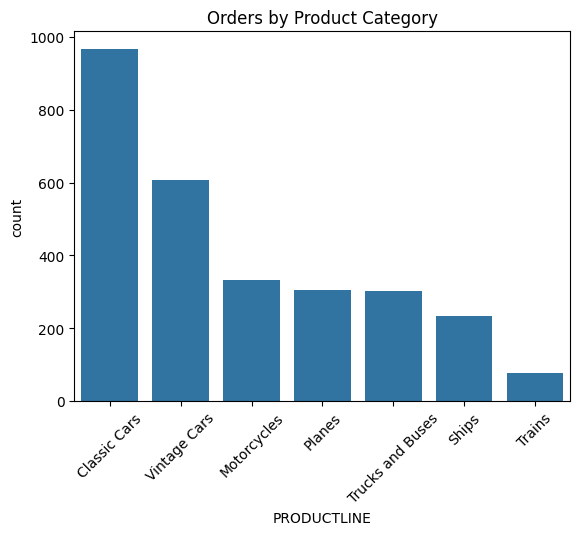

In [50]:
sns.countplot(data=df, x='PRODUCTLINE', order=df['PRODUCTLINE'].value_counts().index)
plt.title("Orders by Product Category")
plt.xticks(rotation=45)
plt.show()

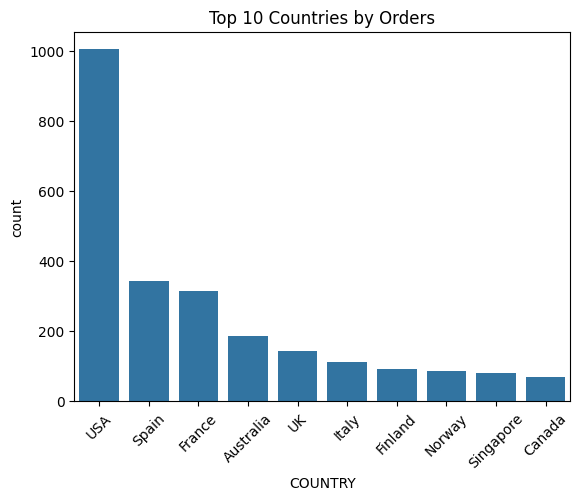

In [51]:
sns.countplot(data=df, x='COUNTRY', order=df['COUNTRY'].value_counts().head(10).index)
plt.title("Top 10 Countries by Orders")
plt.xticks(rotation=45)
plt.show()

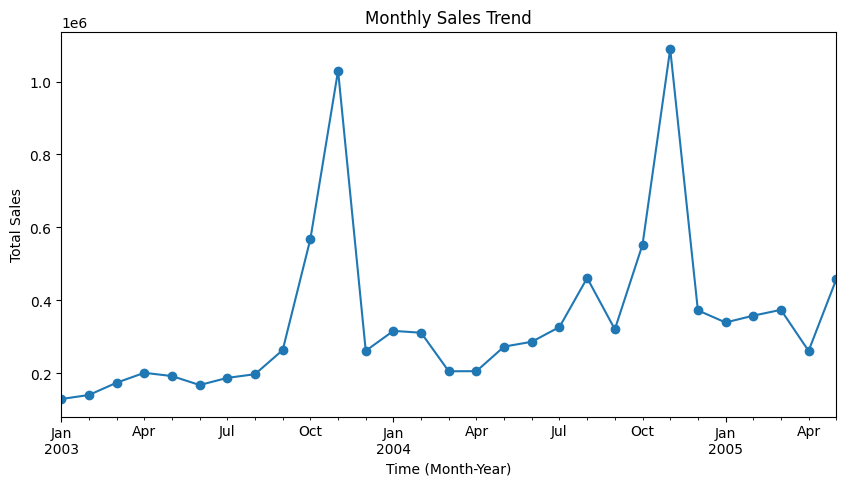

In [52]:
monthly_sales = df.groupby(df['order_date'].dt.to_period("M"))['SALES'].sum()

monthly_sales.plot(kind='line', marker='o', figsize=(10,5))
plt.title("Monthly Sales Trend")
plt.xlabel("Time (Month-Year)")
plt.ylabel("Total Sales")
plt.show()

In [53]:
print("Sales Summary Statistics:\n", df['SALES'].describe())
print("\nQuantity Summary Statistics:\n", df['QUANTITYORDERED'].describe())

Sales Summary Statistics:
 count     2823.000000
mean      3553.889072
std       1841.865106
min        482.130000
25%       2203.430000
50%       3184.800000
75%       4508.000000
max      14082.800000
Name: SALES, dtype: float64

Quantity Summary Statistics:
 count    2823.000000
mean       35.092809
std         9.741443
min         6.000000
25%        27.000000
50%        35.000000
75%        43.000000
max        97.000000
Name: QUANTITYORDERED, dtype: float64


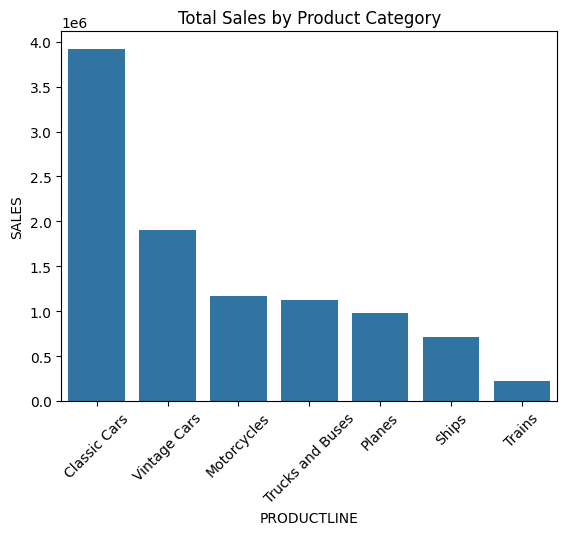

In [54]:

sales_by_category = df.groupby('PRODUCTLINE')['SALES'].sum().reset_index()

sns.barplot(data=sales_by_category, x='PRODUCTLINE', y='SALES', order=sales_by_category.sort_values('SALES', ascending=False)['PRODUCTLINE'])
plt.title("Total Sales by Product Category")
plt.xticks(rotation=45)
plt.show()

In [55]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

print("Numeric Columns Available for Correlation:\n", numeric_df.columns)




Numeric Columns Available for Correlation:
 Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'MSRP'],
      dtype='object')


In [56]:
corr_matrix = numeric_df.corr()

print(corr_matrix)

                 ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER  \
ORDERNUMBER         1.000000         0.065543  -0.002935        -0.055550   
QUANTITYORDERED     0.065543         1.000000   0.005564        -0.018397   
PRICEEACH          -0.002935         0.005564   1.000000        -0.020965   
ORDERLINENUMBER    -0.055550        -0.018397  -0.020965         1.000000   
SALES               0.039919         0.551426   0.657841        -0.058400   
QTR_ID             -0.051383        -0.035323   0.008712         0.040716   
MONTH_ID           -0.039723        -0.039048   0.005152         0.034016   
YEAR_ID             0.904596         0.069535  -0.005938        -0.057367   
MSRP               -0.010280         0.017881   0.670625        -0.021067   

                    SALES    QTR_ID  MONTH_ID   YEAR_ID      MSRP  
ORDERNUMBER      0.039919 -0.051383 -0.039723  0.904596 -0.010280  
QUANTITYORDERED  0.551426 -0.035323 -0.039048  0.069535  0.017881  
PRICEEACH        0.657841

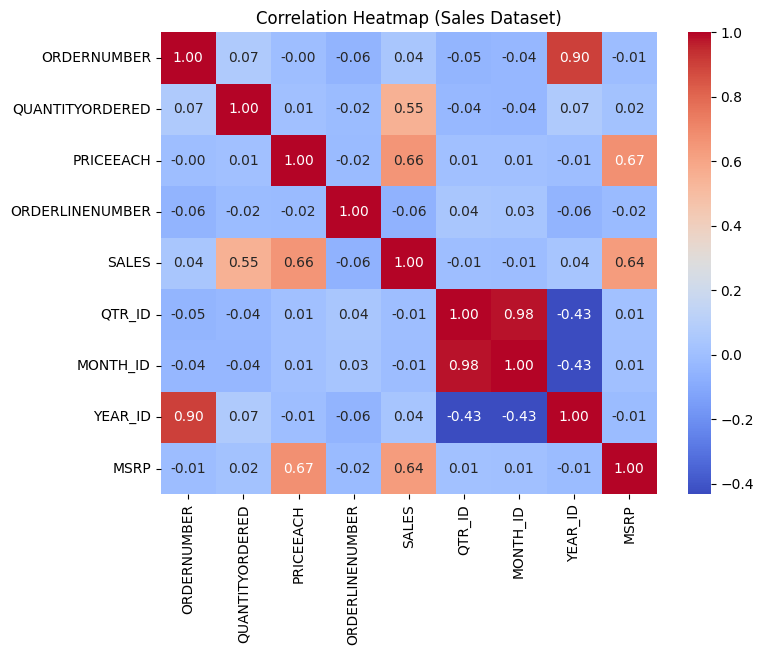

In [57]:
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap (Sales Dataset)")
plt.show()


## Correlation Analysis Insights

From the correlation heatmap and matrix, we can highlight the following relationships between numerical variables in the sales dataset:

1. **Sales Drivers**  
   - `SALES` has a moderate positive correlation with `QUANTITYORDERED` (≈ 0.55).  
     This indicates that larger orders generally lead to higher sales values, which makes intuitive sense.  
   - `SALES` also has a strong positive correlation with `PRICEEACH` (≈ 0.66).  
     Higher prices per unit strongly influence overall sales, suggesting premium products or categories drive revenue disproportionately.  
   - `SALES` is highly correlated with `MSRP` (≈ 0.63), consistent with the effect of product pricing on order totals.

2. **Pricing Relationships**  
   - `PRICEEACH` shows a very strong positive correlation with `MSRP` (≈ 0.67).  
     Unit sales prices align closely with manufacturer list prices, confirming pricing consistency across the dataset.

3. **Time Variables**  
   - `MONTH_ID` and `QTR_ID` are extremely highly correlated (≈ 0.98).  
     This is expected since months directly determine the quarter of the year. Including both variables provides redundant information.  
   - `YEAR_ID` has a negative correlation with `QTR_ID` and `MONTH_ID`. This is likely an artifact of how the dataset is encoded (as year increases, recorded quarter indicators change inversely due to indexing).  

4. **Identifiers**  
   - `ORDERNUMBER` is very strongly correlated with `YEAR_ID` (≈ 0.90).  
     Since order numbers likely increase sequentially over time, they track strongly with the year.  
   - However, `ORDERNUMBER` should not be used for predictive analysis — it is simply a unique identifier and not a causal factor.

5. **Weak or No Correlation**  
   - `ORDERLINENUMBER` (line number within an order) shows very weak negative correlations with most variables, confirming it is just a technical identifier and not important for analysis.  

---

Key Insights
Sales Distribution

Most orders are from mid-value transactions, but there are clear outliers with very high sales amounts. This indicates a handful of premium products or bulk orders significantly impact total revenue.
Top Product Lines

Categories like Classic Cars and Motorcycles consistently generate the highest sales volumes.
Some categories such as Planes/Ships contribute much less, suggesting niche demand.
Geographic Trends

Sales are concentrated in a handful of countries, with the USA, France, Germany, and the UK being the top contributors.
Secondary markets exist in regions like Japan and Brazil, but with significantly lower volume.
Time-based Patterns

Sales clearly show seasonal peaks (certain months/quarters outperform others).
Overall, there is a growth trend across the years, but some dips suggest cyclical demand or external factors.
Correlation Insights

Revenue (SALES) is strongly tied to both unit price (PRICEEACH) and quantity ordered (QUANTITYORDERED).
MSRP correlates closely with PRICEEACH, indicating pricing consistency within product lines.
Quarter (QTR_ID) and month (MONTH_ID) are almost identical in the information they provide (redundant features).
Data Optimization

ORDERNUMBER and ORDERLINENUMBER are identifiers with no analytical value. They can be dropped when preparing data for modeling. 



In [58]:
df = pd.read_csv("output/sales_data_cleaned.csv")

with pd.ExcelWriter("output/sales_report.xlsx", engine="xlsxwriter") as writer:
    df.to_excel(writer, sheet_name="Cleaned Data", index=False)
    # … additional sheets (monthly sales, top products, city sales)

In [60]:



df = pd.read_csv("output/sales_data_cleaned.csv")
df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')

with pd.ExcelWriter("output/sales_report.xlsx", engine="xlsxwriter") as writer:
    
  
    df.to_excel(writer, sheet_name="Cleaned Data", index=False)
    


    monthly_sales = df.groupby(df['order_date'].dt.to_period("M"))['SALES'].sum()
    monthly_sales.index = monthly_sales.index.astype(str) 
    monthly_sales.to_excel(writer, sheet_name="Monthly Sales")
    

    top_products = df.groupby('PRODUCTCODE')['SALES'].sum().sort_values(ascending=False)
    top_products.to_excel(writer, sheet_name="Top Products")
    

    city_sales = df.groupby('CITY')['SALES'].sum().sort_values(ascending=False)
    city_sales.to_excel(writer, sheet_name="City Sales")